In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima




In [2]:
def arima_forecast(df, train_size_ratio=0.7):
    # Xử lý dữ liệu
    df = df.dropna() # Drop missing values
    df = df.reset_index(drop=True) # Reset the index

    # Chuyển giá từ chuỗi sang số
    df['Price'] = df['Price'].str.replace(',', '').astype(float)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Chỉ giữ lại cột Price
    df = df[['Price']]

    # Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
    df.sort_index(inplace=True)

    # Chia dữ liệu cho pha test và pha train
    train_size = int(train_size_ratio * len(df))
    test_size = len(df) - train_size

    train_data = df[:train_size]
    test_data = df[train_size:train_size+test_size]

    # Training
    x_train = np.array((train_data.index - train_data.index[0]).days).reshape(-1, 1)
    y_train = np.array(train_data['Price'])

    # Tìm mô hình ARIMA tốt nhất
    model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

    # Tìm model
    model.fit(y_train)

    # Testing
    x_test = np.array((test_data.index - train_data.index[0]).days).reshape(-1, 1)
    y_test = np.array(test_data['Price'])
    y_pred = model.predict(n_periods=len(y_test))

    # Hàm tính MAPE
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Tính MSE
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print('Testing RMSE:', test_rmse)

    # Tính MAE
    test_mae = np.mean(np.abs(y_pred - y_test))
    print('Testing MAE:', test_mae)

    # Tính toán MAPE
    test_mape = mean_absolute_percentage_error(y_test, y_pred)
    print('Testing MAPE:', test_mape)

    # Dự đoán thêm 90 ngày sau test
    future_days = 90
    future_predictions_30 = model.predict(n_periods=len(y_test) + 30)[-30:]
    future_predictions_60 = model.predict(n_periods=len(y_test) + 60)[-60:]
    future_predictions_90 = model.predict(n_periods=len(y_test) + 90)[-90:]

    # Tạo chỉ số thời gian cho dự đoán mở rộng
    pred_index_extended = pd.date_range(start=test_data.index[-1], periods=91, freq='B')[1:]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Price'], color='blue', label='Train Data')
    plt.plot(test_data.index, test_data['Price'], color='orange', label='Test Data')
    plt.plot(test_data.index, y_pred, color='green', label='Predictions on Test Data')

    # Vẽ dự đoán 30 ngày, 60 ngày và 90 ngày tiếp theo 
    plt.plot(pred_index_extended[:30], future_predictions_30, label='Predictions Days 1-30', color='red')
    plt.plot(pred_index_extended[30:60], future_predictions_60[:30], label='Predictions Days 31-60', color='brown')
    plt.plot(pred_index_extended[60:], future_predictions_90[:30], label='Predictions Days 61-90', color='purple')
    plt.title('ARIMA Model Predictions')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

<h1>BID</h1>

Chia dữ liệu pha train:test 6:4

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12583.930, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12579.183, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12581.099, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12581.113, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12577.621, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12580.255, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.631 seconds
Testing RMSE: 6712.543157170919
Testing MAE: 5229.0209125475285
Testing MAPE: 13.6570544003841


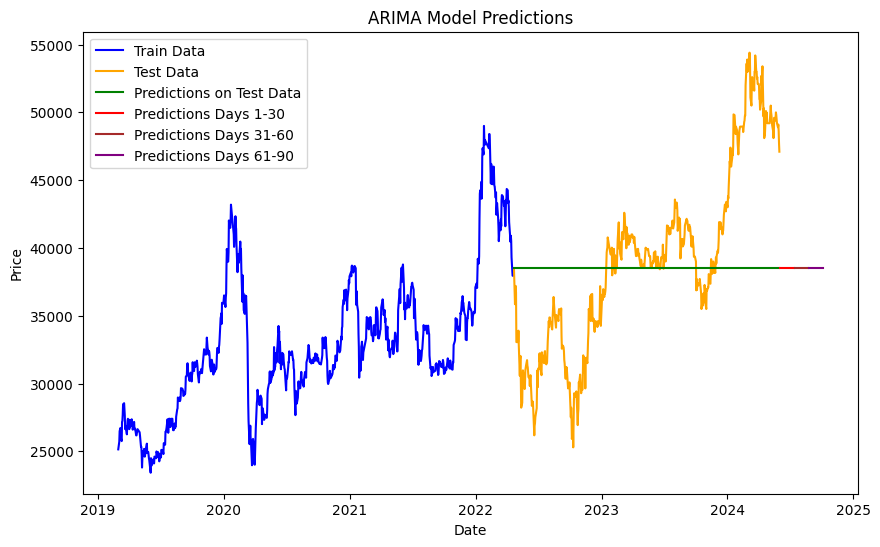

In [3]:
df = pd.read_csv('../data/BID.csv')
arima_forecast(df, train_size_ratio=0.6)

Chia dữ liệu pha train:test 7:3

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14777.443, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14779.352, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14779.359, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14775.489, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14778.789, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.942 seconds
Testing RMSE: 12864.690304253945
Testing MAE: 11594.675126903554
Testing MAPE: 26.619095796813237


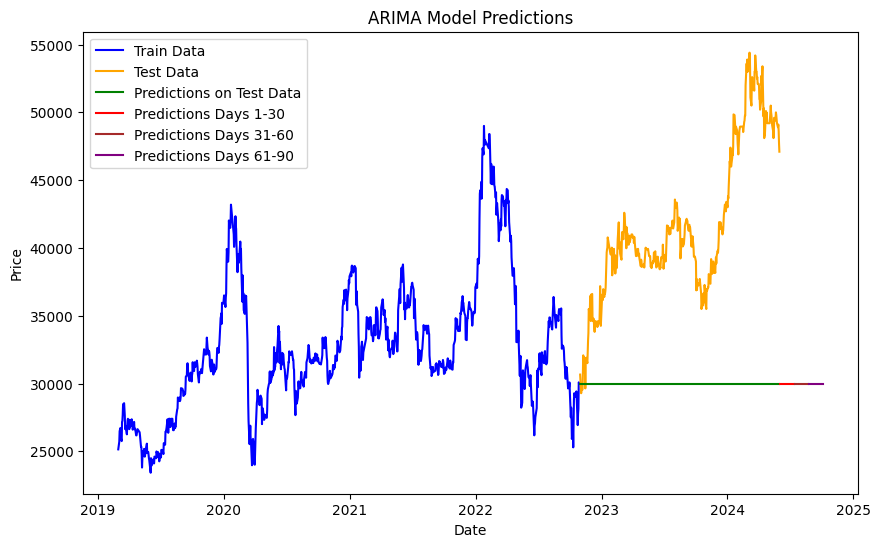

In [4]:

df = pd.read_csv('../data/BID.csv')
arima_forecast(df, train_size_ratio=0.7)

Chia dữ liệu pha train:test 8:2

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16922.822, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16916.399, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16917.985, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16917.979, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16914.754, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16919.943, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.346 seconds
Testing RMSE: 6494.109405128579
Testing MAE: 4785.384030418251
Testing MAPE: 10.060947728198505


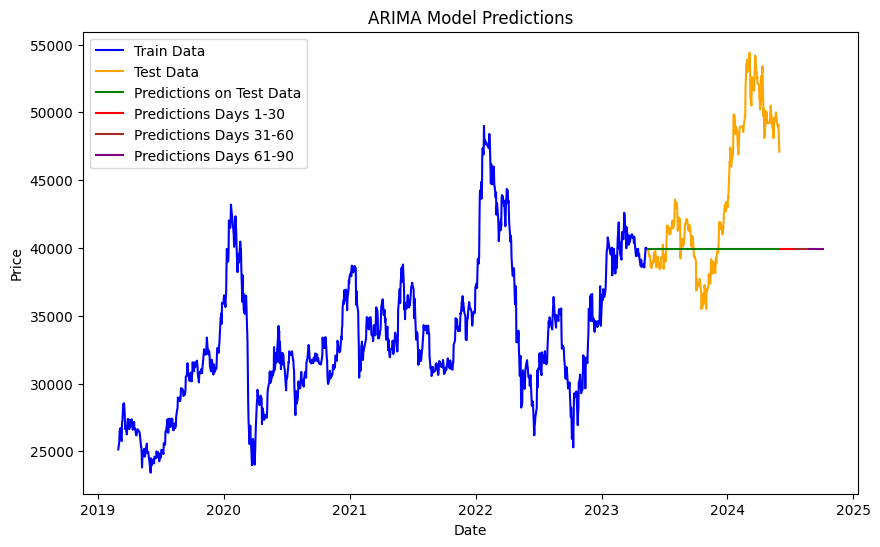

In [5]:

df = pd.read_csv('../data/BID.csv')
arima_forecast(df, train_size_ratio=0.8)

<h1>STB</h1>

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11989.060, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11989.765, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11989.765, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11988.227, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11991.772, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.940 seconds
Testing RMSE: 4472.649243429765
Testing MAE: 3433.0798479087453
Testing MAPE: 15.360553018070783


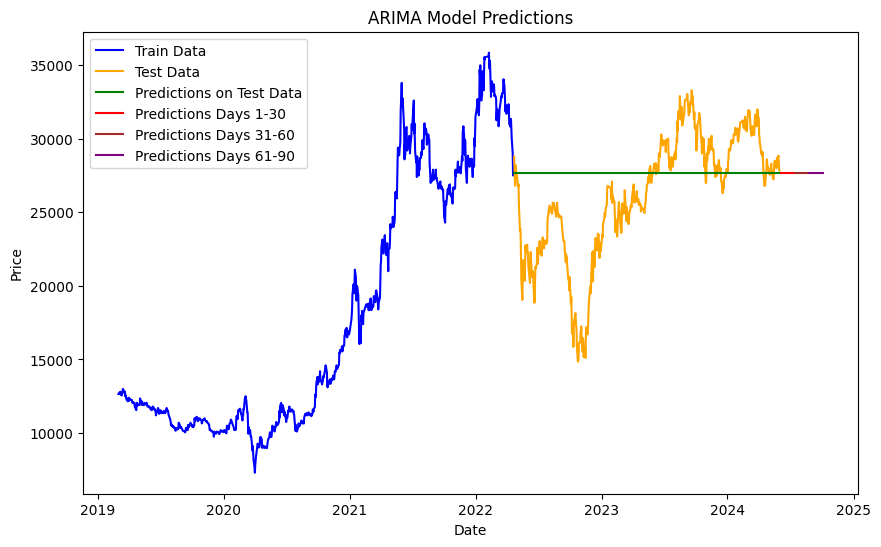

In [6]:
df= pd.read_csv('../data/STB.csv')
arima_forecast(df, train_size_ratio=0.6)

Chia dữ liệu pha train:test 7:3

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14129.275, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14131.263, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14131.270, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14127.323, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14133.189, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.272 seconds
Testing RMSE: 11905.689571059567
Testing MAE: 11330.456852791878
Testing MAPE: 39.905630600104885


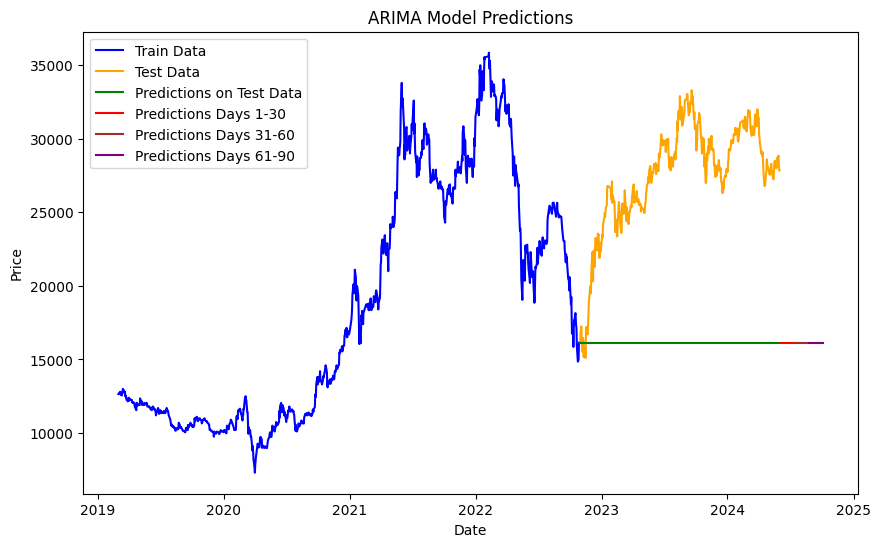

In [7]:
df= pd.read_csv('../data/STB.csv')
arima_forecast(df, train_size_ratio=0.7)

Chia dữ liệu pha train: test 8:2

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16209.849, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16211.385, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16211.332, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16208.486, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16212.689, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.932 seconds
Testing RMSE: 3157.521649297035
Testing MAE: 2718.2509505703424
Testing MAPE: 8.942693722537513


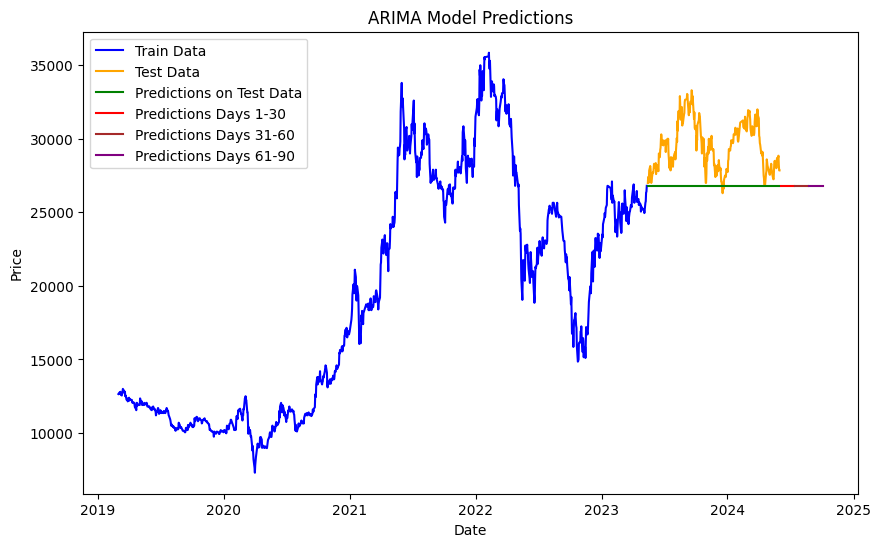

In [8]:
df= pd.read_csv('../data/STB.csv')
arima_forecast(df, train_size_ratio=0.8)

<h1>VIB<h1>

Chia dữ liệu pha train:test 6:4

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11943.649, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11949.822, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11944.529, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11944.767, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11949.485, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11948.336, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11948.278, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11942.830, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11942.820, Time=0.49 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11947.561, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=11944.474, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11946.367, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=11949.438, Time=0.08 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=11946.487, Time=0.81 sec
 ARIMA(3,1,1)(0,0,0

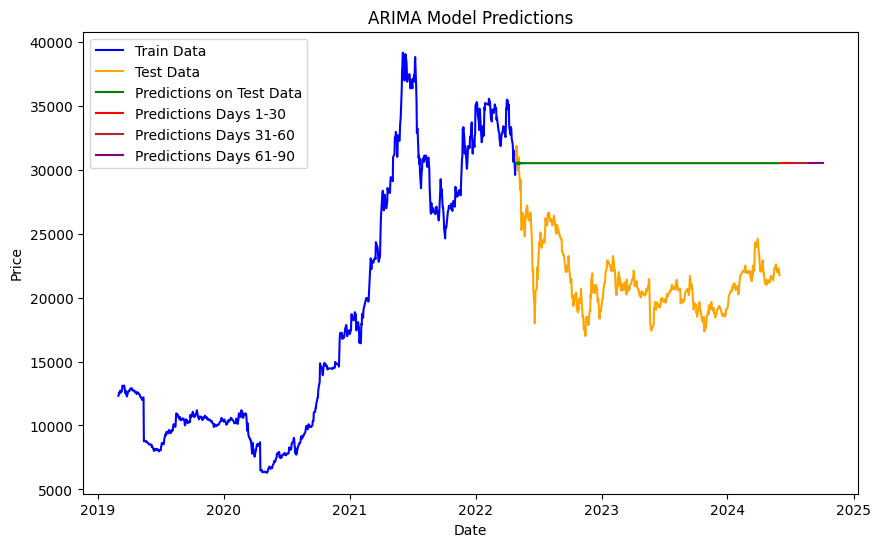

In [9]:
df= pd.read_csv('../data/VIB.csv')
arima_forecast(df, train_size_ratio=0.6)

Chia dữ liệu pha train:test 7:3

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14048.109, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14054.466, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14047.488, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14047.473, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14052.704, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14049.492, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14049.498, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14050.879, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=14045.659, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=14047.676, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=14047.684, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=14045.671, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=14048.772, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.068 seconds
Testing R

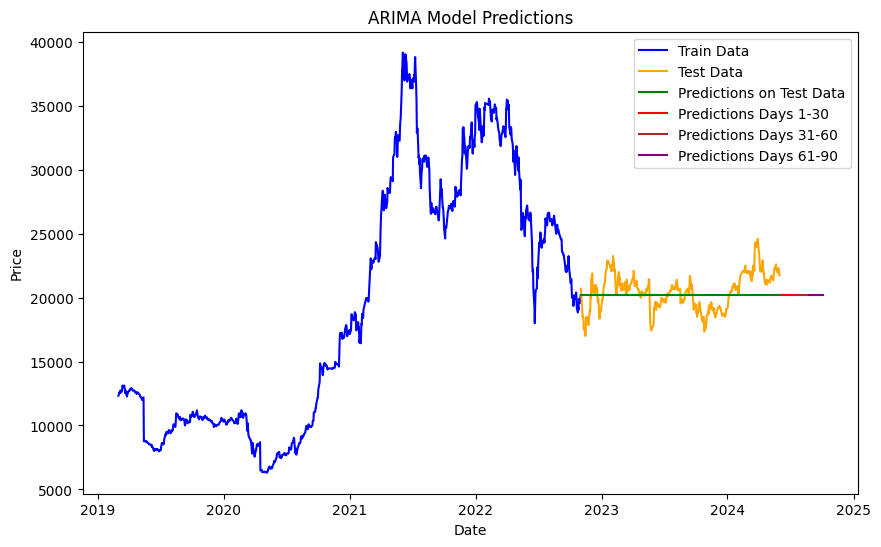

In [10]:
df= pd.read_csv('../data/VIB.csv')
arima_forecast(df, train_size_ratio=0.7)

Chia dữ liệu pha train:test 8:2

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16024.855, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16029.076, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16022.775, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16022.641, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16027.329, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16024.424, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16024.594, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16026.337, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16020.843, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16022.622, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=16022.801, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16020.975, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=16024.159, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.200 seconds
Testing R

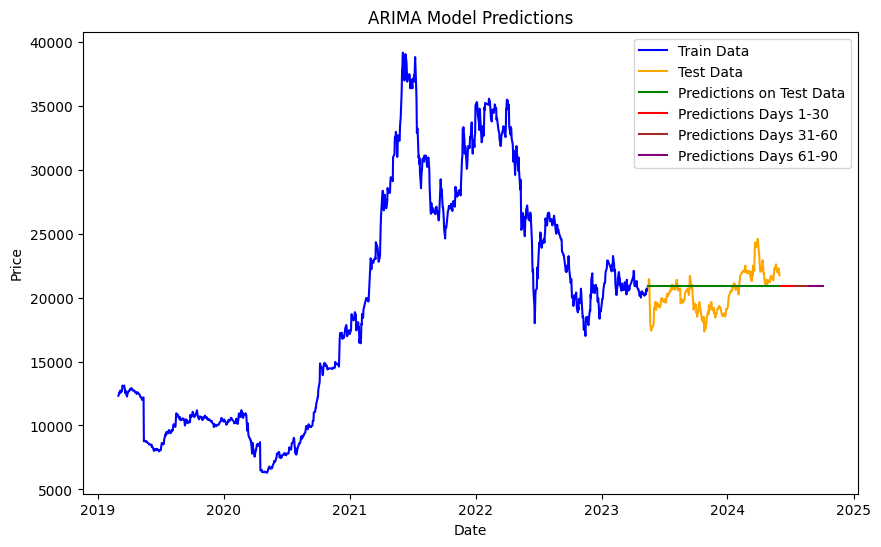

In [11]:
df= pd.read_csv('../data/VIB.csv')
arima_forecast(df, train_size_ratio=0.8)